In [9]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [10]:
data={
    "text": [
        "I love this product! Best purchase ever.🤣 #happy",
        "Terrible service... never coming back! @Company",
        "Check out our website for amazing deals: https://example.com",
        "Product arrived late, but quality is great. 🤞🤞Thanks!",
        "Why is this app so slow? Fix it! afrustrated✌",
        "Amazing experience! Highly recommend this place.⭐⭐⭐⭐⭐⭐",
        "Horrible! Totally waste of money.😊👍✌",
        "Superb customer servicel Keep it up. 👍👍@Support Team",
        "Great value for money. will buy again! #satisfied",
        "Disappointed with the packaging. Could be better.⭐",

    ],
    "label" : [
         "positive", "negative", "neutral", "positive", "negative",
         "positive", "negative", "positive", "positive","negative"
    ]
}

In [11]:
df=pd.DataFrame(data)
df.to_csv('data.csv',index=False)

In [12]:
data=pd.read_csv('data.csv')
data

,text,label
0,I love this product! Best purchase ever.🤣 #happy,positive
1,Terrible service... never coming back! @Company,negative
2,Check out our website for amazing deals: https...,neutral
3,"Product arrived late, but quality is great. 🤞🤞...",positive
4,Why is this app so slow? Fix it! afrustrated✌,negative
5,Amazing experience! Highly recommend this plac...,positive
6,Horrible! Totally waste of money.😊👍✌,negative
7,Superb customer servicel Keep it up. 👍👍@Suppor...,positive
8,Great value for money. will buy again! #satisfied,positive
9,Disappointed with the packaging. Could be bett...,negative


In [13]:
data.head()

,text,label
0,I love this product! Best purchase ever.🤣 #happy,positive
1,Terrible service... never coming back! @Company,negative
2,Check out our website for amazing deals: https...,neutral
3,"Product arrived late, but quality is great. 🤞🤞...",positive
4,Why is this app so slow? Fix it! afrustrated✌,negative


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10 non-null     object
 1   label   10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [15]:
data['text'].head()

0     I love this product! Best purchase ever.🤣 #happy
1      Terrible service... never coming back! @Company
2    Check out our website for amazing deals: https...
3    Product arrived late, but quality is great. 🤞🤞...
4        Why is this app so slow? Fix it! afrustrated✌
Name: text, dtype: object

In [ ]:
nltk.download('punkt')  # For word_tokenize
nltk.download('wordnet')  # For WordNetLemmatizer


stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'\@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = word_tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in text if not word in stop_words]
    text = ' '.join(text)
    return text

data['cleaned_text'] = data['text'].apply(clean_text)
data['cleaned_text'].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shail\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shail\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0         love product best purchase ever🤣 happy
1             terrible service never coming back
2                     check website amazing deal
3    product arrived late quality great 🤞🤞thanks
4                      app slow fix afrustrated✌
Name: cleaned_text, dtype: object

                                                text     label
0   I love this product! Best purchase ever.🤣 #happy  positive
1    Terrible service... never coming back! @Company  negative
2  Check out our website for amazing deals: https...   neutral
3  Product arrived late, but quality is great. 🤞🤞...  positive
4      Why is this app so slow? Fix it! afrustrated✌  negative
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10 non-null     object
 1   label   10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes
None
                                                    text     label
count                                                 10        10
unique                                                10         3
top     I love this product! Best purchase ever.🤣 #happy  positive
freq                                                   1   

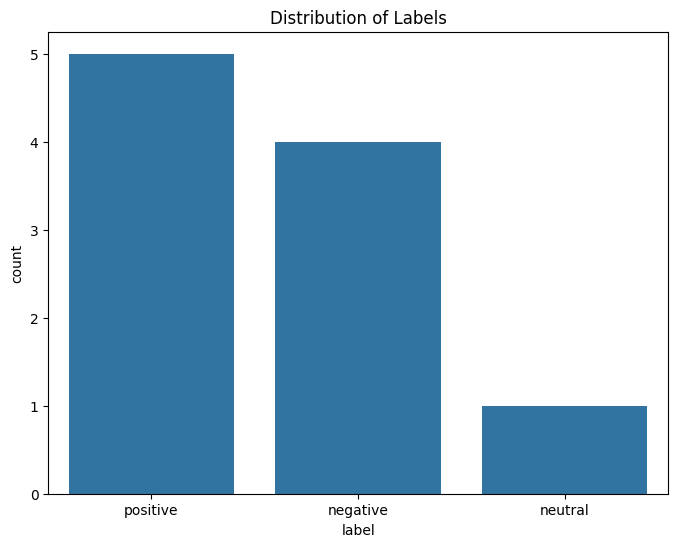

An unexpected error occurred: zero-size array to reduction operation fmin which has no identity


<Figure size 1000x800 with 0 Axes>

In [17]:
# prompt: eda of dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data.csv' is in the current working directory or provide the correct path
try:
    data = pd.read_csv("data.csv")

    # Display basic information
    print(data.head())
    print(data.info())
    print(data.describe())

    # Explore data types
    print(data.dtypes)

    # Check for missing values
    print(data.isnull().sum())

    # Visualize data distribution (example for numerical columns)
    numerical_cols = data.select_dtypes(include=['number'])
    for col in numerical_cols.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()


    # Visualize categorical data (example for 'label' column)
    plt.figure(figsize=(8, 6))
    sns.countplot(x='label', data=data)
    plt.title('Distribution of Labels')
    plt.show()


    # Correlation matrix (for numerical features)
    correlation_matrix = numerical_cols.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

except FileNotFoundError:
    print("Error: 'data.csv' not found. Please make sure the file exists in the correct location.")
except pd.errors.ParserError:
    print("Error: Could not parse 'data.csv'. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [29]:
reviews = [
    "I LOVE this product! It's the best thing I've ever bought. :)",
    "Worst purchase ever!!! I regret it so much. Waste of money!",
    "Amazing quality. Great price. Will buy again! Highly recommend!!!",
    "Okay, but not what I expected. The product is good, but not great.",
    "Check out our site at https://www.product.com for more info.",
    "This is a great product for $50. I highly recommend it!",
    "Had issues with the product... but customer service was helpful."
]


def clean_review(text):
    text = text.lower()
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'\@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = word_tokenize(text)
    text = [lemmatizer.lemmatize(word) for word in text if not word in stop_words]
    text = ' '.join(text)
    return text


cleaned_reviews = [clean_review(review) for review in reviews]

print(cleaned_reviews)

['love product best thing ive ever bought', 'worst purchase ever regret much waste money', 'amazing quality great price buy highly recommend', 'okay expected product good great', 'check site info', 'great product highly recommend', 'issue product customer service helpful']


In [35]:
import re
from nltk.corpus import stopwords
from typing import List

def clean_reviews(reviews: List[str], remove_stopwords: bool = True, 
                 remove_numbers: bool = True) -> List[str]:
    """
    Clean and preprocess review texts with configurable options.
    
    Args:
        reviews (List[str]): List of review texts to clean
        remove_stopwords (bool): Whether to remove stopwords (default: True)
        remove_numbers (bool): Whether to remove numbers (default: True)
    
    Returns:
        List[str]: List of cleaned review texts
    """
    # Load English stop words if needed
    stop_words = set(stopwords.words('english')) if remove_stopwords else set()
    
    # Common positive/negative emoticons to handle
    emoticons = {
        'positive': [':)', ':-)', ':D', '=)', ':]', ':}'],
        'negative': [':(', ':-(', ':(', '=[', ':[', ':{']
    }
    
    # Compile regex patterns for better performance
    url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    number_pattern = re.compile(r'\b\d+\b')
    space_pattern = re.compile(r'\s+')
    
    cleaned_reviews = []
    
    for review in reviews:
        # Convert to lowercase
        text = review.lower()
        
        # Replace emoticons with their meaning
        for sentiment, icons in emoticons.items():
            for icon in icons:
                text = text.replace(icon, f' {sentiment} ')
        
        # Remove URLs
        text = url_pattern.sub('', text)
        
        # Remove numbers if specified
        if remove_numbers:
            text = number_pattern.sub('', text)
        
        # Remove punctuation while preserving contractions
        text = re.sub(r'[^\w\s\']', ' ', text)
        
        # Handle contractions properly
        text = re.sub(r'\'s\b', '', text)  # remove possessive 's
        text = re.sub(r'\'', '', text)     # remove remaining apostrophes
        
        # Remove extra whitespace
        text = space_pattern.sub(' ', text).strip()
        
        # Remove stop words if specified
        if remove_stopwords:
            text = ' '.join(word for word in text.split() 
                          if word not in stop_words)
        
        cleaned_reviews.append(text)
    
    return cleaned_reviews

# Example usage
if __name__ == "__main__":
    reviews = [
        "I LOVE this product! It's the best thing I have bought. :)",
        "Worst purchase ever!!! I regret it so much. Waste of money!",
        "Amazing quality. Great price. Will buy again! Highly recommend!!!",
        "Okay, but not what I expected. The product is good, but not great.",
        "Check out our site at https://www.product.com for more info.",
        "This is a great product for $50. I highly recommend it!",
        "Had issues with the product... but customer service was helpful."
    ]
    
    # Clean reviews with default settings
    cleaned = clean_reviews(reviews)
    print("\nCleaned reviews (default settings):")
    for original, cleaned_text in zip(reviews, cleaned):
        print(f"\nOriginal: {original}")
        print(f"Cleaned:  {cleaned_text}")
    
    # Clean reviews keeping stopwords
    cleaned_with_stopwords = clean_reviews(reviews, remove_stopwords=False)
    print("\nCleaned reviews (keeping stopwords):")
    for original, cleaned_text in zip(reviews, cleaned_with_stopwords):
        print(f"\nOriginal: {original}")
        print(f"Cleaned:  {cleaned_text}")


Cleaned reviews (default settings):

Original: I LOVE this product! It's the best thing I have bought. :)
Cleaned:  love product best thing bought positive

Original: Worst purchase ever!!! I regret it so much. Waste of money!
Cleaned:  worst purchase ever regret much waste money

Original: Amazing quality. Great price. Will buy again! Highly recommend!!!
Cleaned:  amazing quality great price buy highly recommend

Original: Okay, but not what I expected. The product is good, but not great.
Cleaned:  okay expected product good great

Original: Check out our site at https://www.product.com for more info.
Cleaned:  check site info

Original: This is a great product for $50. I highly recommend it!
Cleaned:  great product highly recommend

Original: Had issues with the product... but customer service was helpful.
Cleaned:  issues product customer service helpful

Cleaned reviews (keeping stopwords):

Original: I LOVE this product! It's the best thing I have bought. :)
Cleaned:  i love this